In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
filepath = "C:\\Users\\abhijit.a.pande\\Machine Learning\\datasets\\lending_club_loan_two.csv"

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(filepath)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [5]:
len(df['emp_title'].unique())

173106

In [6]:
df = df.drop('emp_title', axis = 1)

In [7]:
df[df['revol_util'].isnull()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1686,2150.0,36 months,11.14,70.54,B,B2,< 1 year,MORTGAGE,50000.0,Source Verified,...,2.0,0.0,0.0,NaN,21.0,w,INDIVIDUAL,3.0,0.0,"77373 Mendoza Causeway Suite 785\nGibsonhaven,..."
3019,5000.0,36 months,13.79,170.38,C,C5,< 1 year,RENT,45000.0,Source Verified,...,8.0,0.0,0.0,NaN,11.0,f,INDIVIDUAL,NaN,0.0,"555 Smith Meadows Apt. 429\nBryanfurt, TN 05113"
4931,8000.0,36 months,13.67,272.15,B,B5,2 years,RENT,30000.0,Source Verified,...,2.0,0.0,0.0,NaN,15.0,w,INDIVIDUAL,0.0,0.0,"PSC 6735, Box 8380\nAPO AE 30723"
5382,7000.0,36 months,12.99,235.83,B,B4,10+ years,MORTGAGE,61000.0,Verified,...,2.0,0.0,0.0,NaN,32.0,f,INDIVIDUAL,5.0,0.0,826 Glover Spring Suite 979\nNorth Amandashire...
9016,8000.0,36 months,12.12,266.18,B,B3,3 years,RENT,49000.0,Not Verified,...,10.0,0.0,0.0,NaN,18.0,f,INDIVIDUAL,0.0,0.0,"16908 Taylor Valley Suite 815\nBuchananfort, I..."


In [8]:
def feat_info(col_name):
    print (df[col_name].describe())
feat_info("mort_acc")

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64


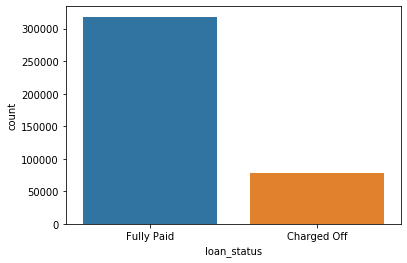

In [9]:
sb.countplot(df['loan_status'])

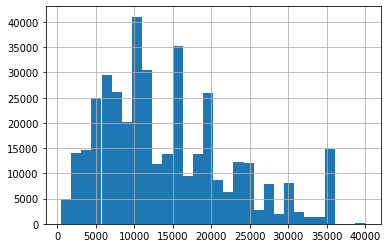

In [10]:
df['loan_amnt'].hist(bins = 30)

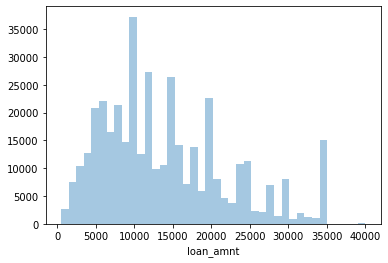

In [11]:
sb.distplot(df['loan_amnt'], bins = 40, kde = False)

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


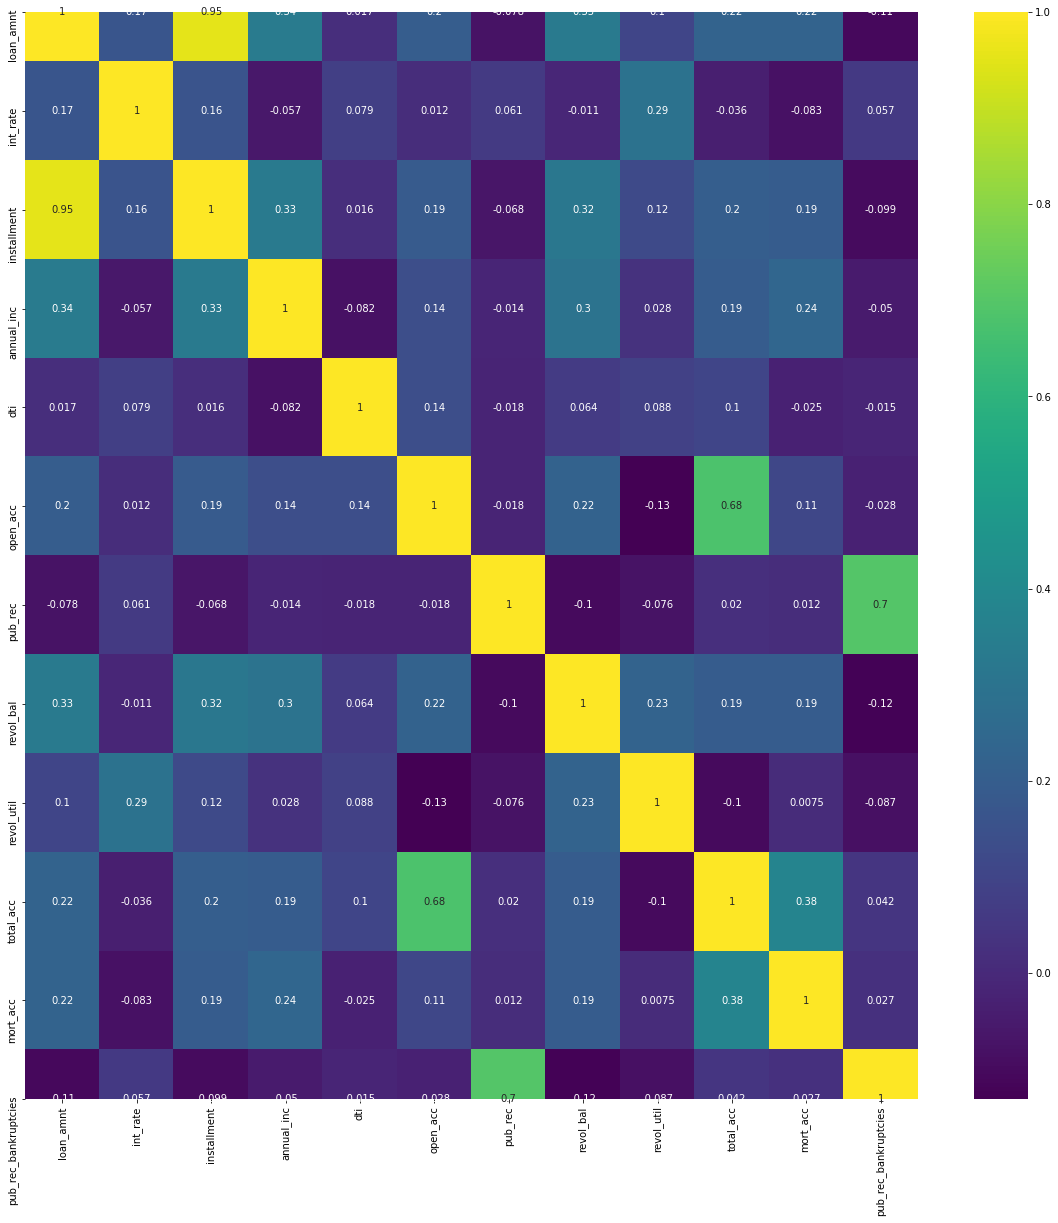

In [13]:
plt.figure(figsize = (20,20))
plt.ylim(10,0)
sb.heatmap(df.corr(), annot = True, cmap = "viridis")

In [14]:
feat_info('installment')

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64


In [15]:
feat_info('loan_amnt')

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64


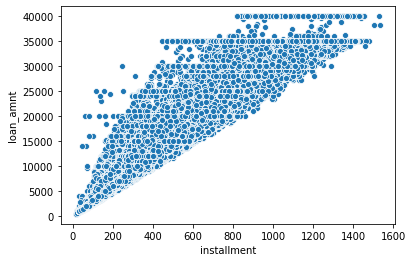

In [16]:
sb.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

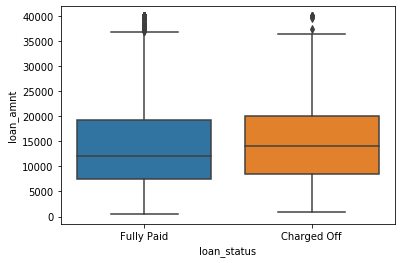

In [17]:
sb.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [18]:
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

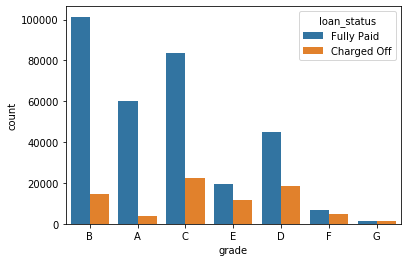

In [22]:
sb.countplot('grade', data = df, hue = 'loan_status')

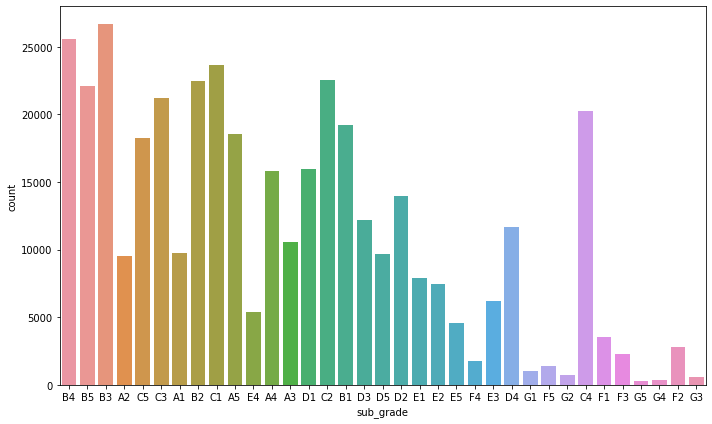

In [23]:

plt.figure(figsize=(10,6))
sb.countplot(df['sub_grade'])
plt.tight_layout()

In [24]:
sub_grade_order = sorted(df['sub_grade'].unique())

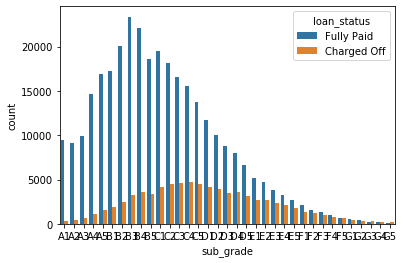

In [25]:
sb.countplot(x = 'sub_grade', order = sub_grade_order, hue = 'loan_status', data = df)

In [26]:
fg = df[(df['sub_grade']>'F') | (df['sub_grade']>'G')]

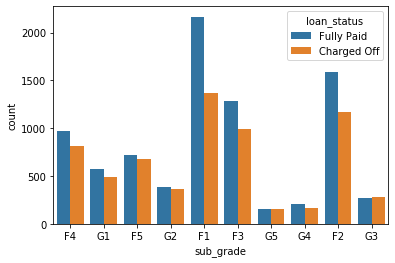

In [27]:
sb.countplot(x = fg['sub_grade'], hue = 'loan_status', data = fg)

In [28]:
def updloanstatus(loan_status):
    if loan_status == "Fully Paid":
        return 1
    else:
        return 0
df['loan_repaid']= df ['loan_status'].apply(updloanstatus)

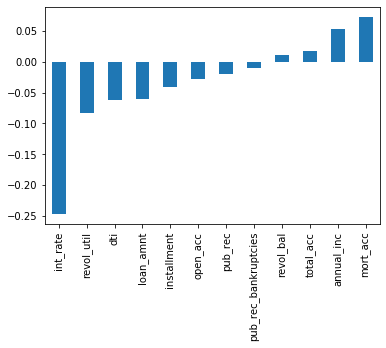

In [29]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = "bar")

In [30]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,0.803871
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174,0.397068
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,1.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,1.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,1.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,1.000000


In [31]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [32]:
def updemplen(emplen):
    emplen = str(emplen).replace("nan", "0")
    emplen = str(emplen).replace(" years", "")
    emplen = str(emplen).replace(" year", "")
    emplen = str(emplen).replace("< ", "")
    emplen = str(emplen).replace("+", "")
    return int(emplen)

df['emp_length'] = df['emp_length'].apply(updemplen)

In [33]:
df['emp_length'].count()

396030

In [34]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000,396030.000000
mean,14113.888089,13.639400,431.849698,5.744257,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,0.803871
std,8357.441341,4.472157,250.727790,3.660192,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174,0.397068
min,500.000000,5.320000,16.080000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,2.000000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000,1.000000
50%,12000.000000,13.330000,375.430000,6.000000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,1.000000
75%,20000.000000,16.490000,567.300000,10.000000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,1.000000
max,40000.000000,30.990000,1533.810000,10.000000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,1.000000


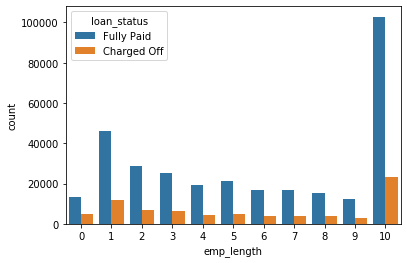

In [35]:
sb.countplot(x = 'emp_length', data = df, hue = 'loan_status')

In [36]:
df_loanpaid = df.pivot_table(index= "emp_length", columns = 'loan_status', aggfunc = 'count')['address']

In [37]:
df_loanpaid['Default Ratio'] = df_loanpaid['Charged Off']/df_loanpaid['Fully Paid']

In [38]:
df_loanpaid

loan_status,Charged Off,Fully Paid,Default Ratio
emp_length,,,
0,5038,13263,0.379854
1,11717,45890,0.255328
2,6924,28903,0.239560
3,6182,25483,0.242593
4,4608,19344,0.238213
5,5092,21403,0.237911
6,3943,16898,0.233341
7,4055,16764,0.241887
8,3829,15339,0.249625


In [39]:
df = df.drop('emp_length', axis = 1)

In [40]:
df = df.drop('title',axis = 1)

In [41]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [42]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [74]:
total_mort_acc_avg = df.groupby("total_acc").mean()['mort_acc']
total_mort_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [71]:
def fillinmortacc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_mort_acc_avg[total_acc]
    else:
        return mort_acc

In [76]:
df['mort_acc'] = df.apply(lambda x: fillinmortacc(x['total_acc'], x['mort_acc']),axis=1)

In [73]:
#df.pivot_table(index = 'total_acc', values = 'mort_acc', aggfunc = 'mean')

In [77]:
df['mort_acc'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-null float64
revol_bal               396030 non-null float64
revol_util              395754 non-null float64
total_acc               396030 non

In [80]:
df = df.dropna()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null object
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non

In [82]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [85]:
df['term'] = df['term'].apply(lambda term:int(term[:3]))

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [86]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [87]:
df = df.drop('grade', axis = 1)

In [88]:
dummies = pd.get_dummies(df['sub_grade'], drop_first= True)

In [90]:
df = df.drop('sub_grade', axis = 1)

In [91]:
df = pd.concat([df,dummies],axis = 1)

In [93]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first= True)
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1)

In [95]:
df = pd.concat([df,dummies],axis = 1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 71 columns):
loan_amnt                              395219 non-null float64
term                                   395219 non-null int64
int_rate                               395219 non-null float64
installment                            395219 non-null float64
home_ownership                         395219 non-null object
annual_inc                             395219 non-null float64
issue_d                                395219 non-null object
loan_status                            395219 non-null object
dti                                    395219 non-null float64
earliest_cr_line                       395219 non-null object
open_acc                               395219 non-null float64
pub_rec                                395219 non-null float64
revol_bal                              395219 non-null float64
revol_util                             395219 non-null float64
total_acc    

In [97]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [101]:
def updhomeown(homestat):
    if homestat == "NONE" or homestat == "ANY":
        return "OTHER"
    else:
        return homestat
df['home_ownership'] = df['home_ownership'].apply(updhomeown)

In [102]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [112]:
df = pd.concat(
    [df.drop('home_ownership', axis = 1), pd.get_dummies(df['home_ownership'], drop_first = True)], axis = 1)

In [113]:
df['zips'] = df['address'].apply(lambda address: address[-5:])

In [117]:
df = pd.concat([df.drop('zips', axis = 1), pd.get_dummies(df['zips'],drop_first=True)], axis = 1)

In [119]:
df.drop('issue_d',axis = 1)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda credit: int(credit[-4:]))

In [129]:
df = df.drop(['issue_d', 'loan_status', 'address'], axis = 1)

In [134]:
y = df['loan_repaid'].values

In [133]:
x = df.drop('loan_repaid', axis = 1).values

In [135]:
print(len(df))

395219


In [136]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 100)

In [138]:
scaler = MinMaxScaler()

In [139]:
x_train = scaler.fit_transform(x_train)

In [140]:
x_test = scaler.transform(x_test)

In [156]:
model = Sequential()

In [159]:
es = EarlyStopping(monitor="val_loss", patience = 5, mode = "min", verbose = 1)

In [158]:
model.add(Dense(156, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(78, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(39, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = 'rmsprop')

In [160]:
model.fit(x = x_train, y = y_train, epochs = 25, batch_size=256, validation_data=(x_test,y_test),verbose=2, callbacks=[es])

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 - 13s - loss: 0.2890 - val_loss: 0.2614
Epoch 2/25
316175/316175 - 10s - loss: 0.2674 - val_loss: 0.2598
Epoch 3/25
316175/316175 - 8s - loss: 0.2665 - val_loss: 0.2618
Epoch 4/25
316175/316175 - 31s - loss: 0.2658 - val_loss: 0.2596
Epoch 5/25
316175/316175 - 33s - loss: 0.2654 - val_loss: 0.2597
Epoch 6/25
316175/316175 - 13s - loss: 0.2652 - val_loss: 0.2601
Epoch 7/25
316175/316175 - 22s - loss: 0.2649 - val_loss: 0.2589
Epoch 8/25
316175/316175 - 12s - loss: 0.2647 - val_loss: 0.2598
Epoch 9/25
316175/316175 - 11s - loss: 0.2642 - val_loss: 0.2601
Epoch 10/25
316175/316175 - 24s - loss: 0.2640 - val_loss: 0.2597
Epoch 11/25
316175/316175 - 11s - loss: 0.2639 - val_loss: 0.2607
Epoch 12/25
316175/316175 - 22s - loss: 0.2637 - val_loss: 0.2597
Epoch 00012: early stopping


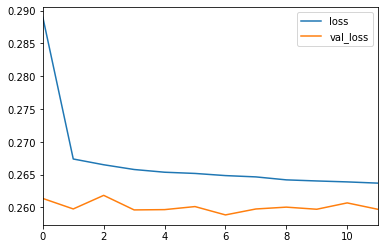

In [162]:
from tensorflow.keras.models import load_model
losses = pd.DataFrame(model.history.history)
losses.plot()

In [168]:
predictions = model.predict(x_test)
predictions[predictions[:] < 0.5] = 0

In [169]:
predictions[predictions[:] >= 0.5] = 1

In [171]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15463
           1       0.88      1.00      0.94     63581

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [155]:
y_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
model.save("bankmodel.mdl")
load_model("bankmodel.mdl")

In [172]:
import random
random.seed(101)

In [173]:
random_ind = random.randint(0,len(df))

In [174]:
new_customer = df.drop('loan_repaid', axis = 1).iloc[random_ind]

In [175]:
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [176]:
new_customer.values

array([2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
       3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
       6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e

In [177]:
new_customer.values.reshape(1,78)

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
        6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [179]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [180]:
model.predict(new_customer)

array([[0.6559902]], dtype=float32)

In [182]:
df.loc[random_ind]['loan_repaid']

1.0